In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import LabelEncoder
from umap import UMAP

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Загрузка данных

In [3]:
data = pandas.read_csv('data/loan_data.csv')

Пропущенные значения

In [4]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Преобразование категориальных признаков. 

In [5]:
keys_to_factorize = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
mappings = {}

for key in keys_to_factorize:
    data[key], mappings[key] = pandas.factorize(data[key])

print(mappings)

{'person_gender': Index(['female', 'male'], dtype='object'), 'person_education': Index(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'], dtype='object'), 'person_home_ownership': Index(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype='object'), 'loan_intent': Index(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'],
      dtype='object'), 'previous_loan_defaults_on_file': Index(['No', 'Yes'], dtype='object')}


Вывод матрицы корреляции

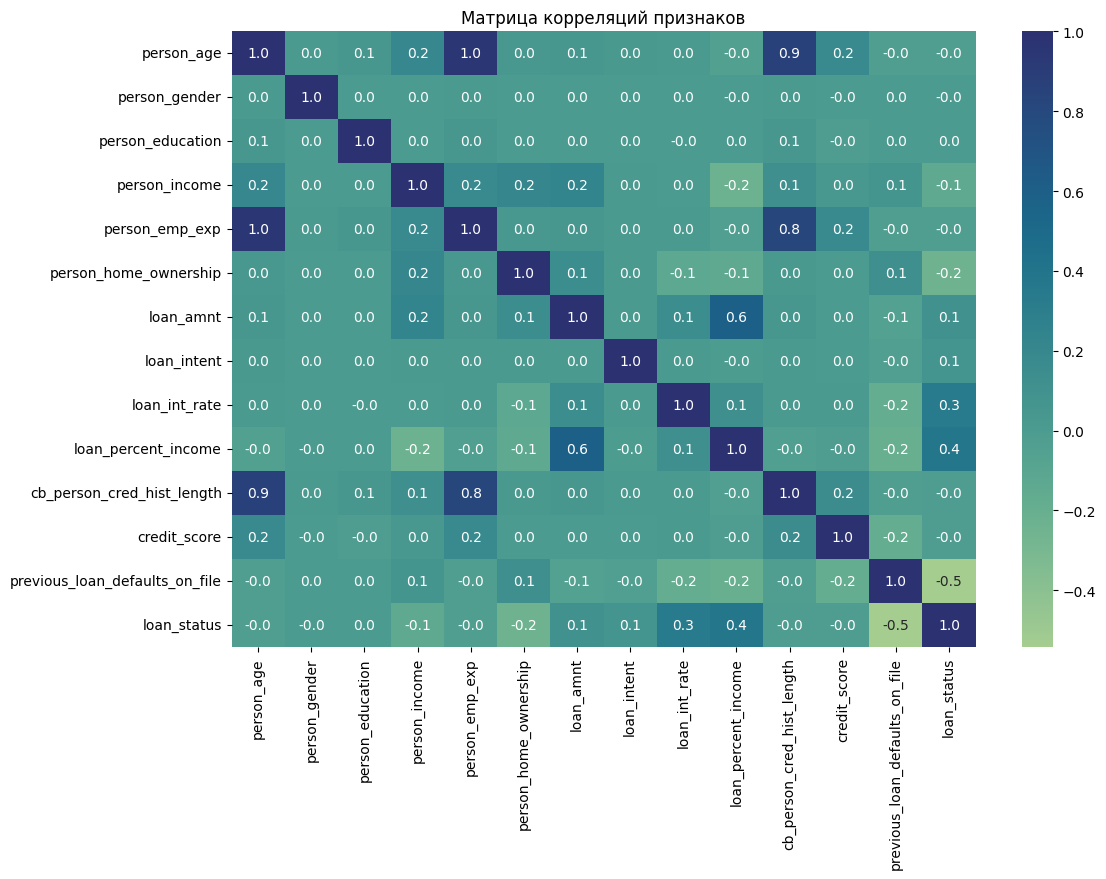

In [6]:
plt.figure(figsize=(12, 8))
seaborn.heatmap(data.corr(), annot=True, cmap='crest', fmt=".1f")
plt.title('Матрица корреляций признаков')
plt.show()

Парные отношения признаков

<Figure size 1920x1440 with 0 Axes>

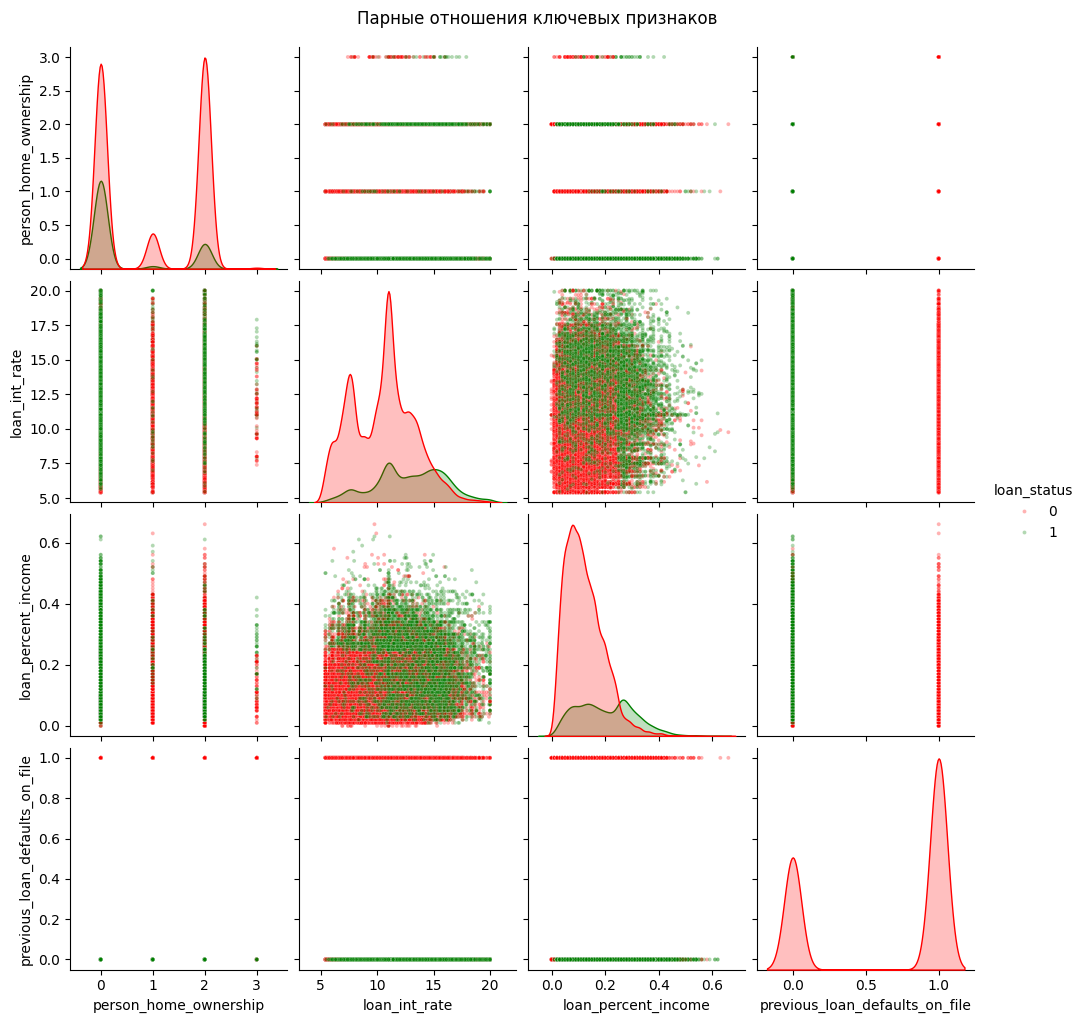

In [8]:
plt.figure(dpi=300)
key_features = ['person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file', 'loan_status']
seaborn.pairplot(data[key_features], kind="scatter", hue='loan_status', palette={0: 'red', 1: 'green'}, plot_kws={'s': 8, 'alpha': 0.3})
plt.suptitle('Парные отношения ключевых признаков', y=1.02)
plt.show()

Масштабирование данных

In [9]:
x_scaled = StandardScaler().fit_transform(data.drop('loan_status', axis=1))
y = data['loan_status']

Графики методами

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


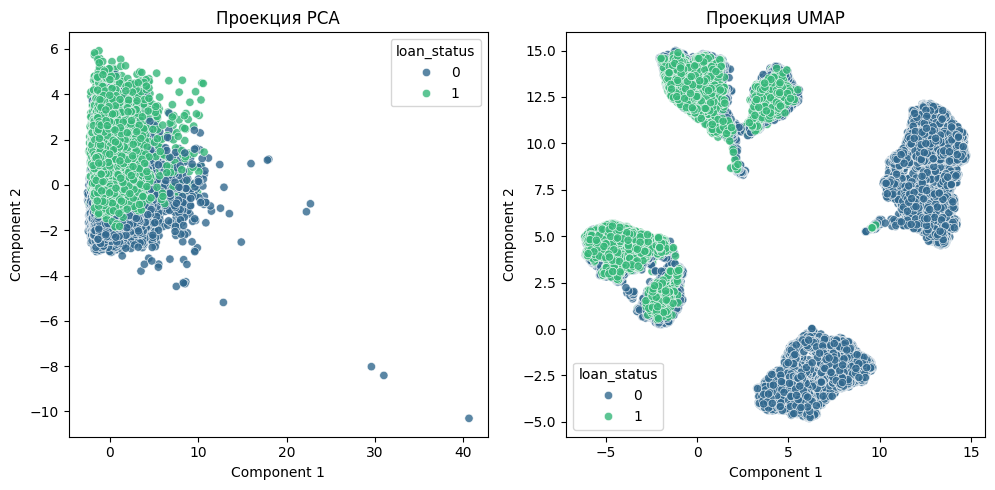

In [10]:
dimensions = 2

methods = {
    'PCA': PCA(n_components=dimensions),
    # 'MDS': MDS(n_components=dimensions, random_state=0),
    #'t-SNE': TSNE(n_components=dimensions, random_state=0),
    'UMAP': UMAP(n_components=dimensions, random_state=0)
}

fig = plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(methods.items(), 1):
    reduced_data = model.fit_transform(x_scaled)
    
    if dimensions == 3:
        sp = fig.add_subplot(1, 4, i, projection='3d')
        sp.scatter(xs=reduced_data[:,0], ys=reduced_data[:,1], zs=reduced_data[:,2], zdir='z', c=y)
        sp.set_title(f'Проекция {name}')
        sp.set_xlabel('Component 1')
        sp.set_ylabel('Component 2')
        sp.set_zlabel('Component 3')
    else:
        plt.subplot(1, 4, i)
        seaborn.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], 
                    hue=y, palette='viridis', alpha=0.8)
        plt.title(f'Проекция {name}')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')

plt.tight_layout()
plt.show()